In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfcc = pd.read_csv("credit_card/clean_data.csv")
dfcc.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [70]:
dfcc.Income_type.unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [72]:
dfcc.Occupation_type.value_counts()

Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                  782
Drivers                   623
High skill tech staff     357
Accountants               300
Medicine staff            291
Cooking staff             193
Security staff            182
Cleaning staff            146
Private service staff      86
Low-skill Laborers         53
Secretaries                46
Waiters/barmen staff       40
HR staff                   22
IT staff                   18
Realty agents              16
Name: Occupation_type, dtype: int64

In [74]:
dfcc.Education_type.value_counts()

Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: Education_type, dtype: int64

In [75]:
dfcc.Family_status.value_counts()

Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: Family_status, dtype: int64

In [4]:
# corrs = dfcc.corr()
# plt.figure(figsize=(16,12))
# sns.heatmap(corrs)
# plt.show()

0                 (0.08389257832139187, Account_length)
1                         (0.08190587720531241, Gender)
2                   (0.07894768409769266, Own_property)
3                            (0.07717982918147838, Age)
4          (0.06819669546047047, Family_status_Married)
5                        (0.06368670911525186, Own_car)
6                     (0.06359163175938189, Num_family)
7                   (0.06285671403621051, Total_income)
8                 (0.06272912767259418, Years_employed)
9     (0.057175119135012144, Income_type_Commercial ...
10           (0.05101626411946244, Income_type_Working)
11    (0.040789054477717204, Education_type_Higher e...
12                  (0.03632689859050923, Num_children)
13    (0.034086740740729496, Education_type_Secondar...
14    (0.03134015299642026, Family_status_Single / n...
15    (0.016230995355738596, Housing_type_House / ap...
16        (0.015162941262870799, Income_type_Pensioner)
17    (0.013814450115978098, Family_status_Civil mar...
18     (0.01068931686477455, Income_type_State servant)
19       (0.01043617633553381, Family_status_Separated)
20                   (0.008439181204533314, Unemployed)
21    (0.007568449431020841, Education_type_Incomple...
22           (0.00732115997343425, Family_status_Widow)
23    (0.005504828435960183, Housing_type_With parents)
24    (0.0045409019547406546, Housing_type_Municipal...
25    (0.0026844979352010838, Housing_type_Rented ap...
26    (0.001963454401813781, Education_type_Lower se...
27    (0.001092850604491624, Housing_type_Office apa...
28    (0.00035419027007210606, Housing_type_Co-op ap...
29    (0.0002729986382955164, Education_type_Academi...
30        (0.00020253030590593548, Income_type_Student)
dtype: object

In [35]:
dfcc.groupby('Gender').mean()

,ID,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Target
Gender,,,,,,,,,,,,,,
0,5.075674e+06,0.24229,0.690811,0.199589,0.294006,0.086193,0.221572,0.392377,2.129053,27.372766,166644.609204,45.257156,5.795746,0.128420
1,5.076909e+06,0.60189,0.635558,0.250738,0.275842,0.090077,0.087123,0.479622,2.282634,27.078263,208461.511223,41.033303,5.420072,0.139102


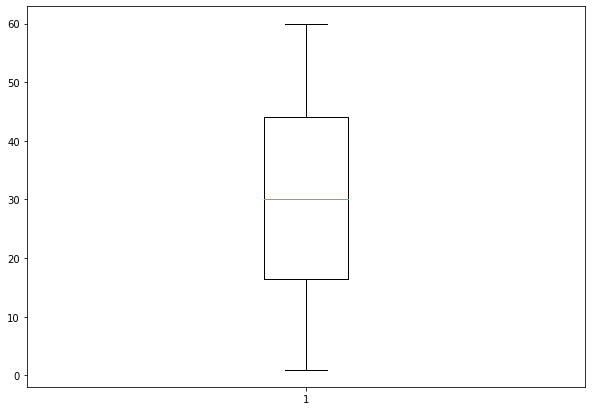

In [19]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(dfcc.loc[dfcc.Target == 1, 'Account_length'])

#plt.boxplot(dfcc.loc[dfcc.Target == 0, 'Account_length'])
 
# show plot
plt.show()

In [ ]:
ac1 = pd.DataFrame(dfcc.loc[dfcc.Target == 1, 'Account_length']).reset_index(drop=True)

ac0 = pd.DataFrame(dfcc.loc[dfcc.Target == 0, 'Account_length']).reset_index(drop=True)


In [29]:
box = ac1.merge(ac0, on='ind').drop('ind', axis=1)

In [30]:
box

,Account_length_x,Account_length_y
0,15,29
1,25,4
2,31,20
3,10,5
4,43,17
...,...,...
1278,20,11
1279,19,11
1280,21,59
1281,32,21


<AxesSubplot:>

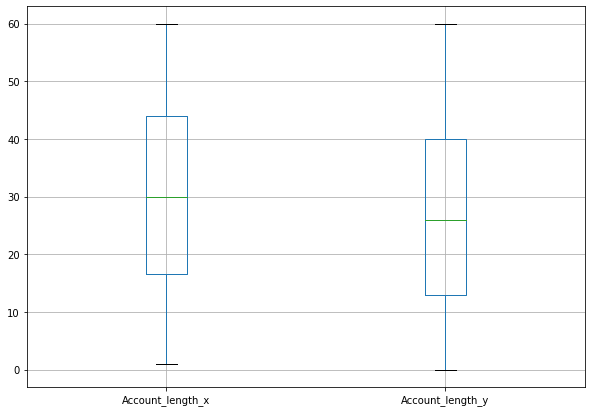

In [32]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot

box.boxplot(column=['Account_length_x', 'Account_length_y'], grid=True, figsize=(10, 6))

# show plot
#plt.show()

In [27]:
ac1['ind'] = ac1.index
ac0['ind'] = ac0.index

In [7]:
dfcct.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [6]:
dfcct = dfcc.copy()

In [8]:
dfcct.Gender = dfcct.Gender.replace(1, 'Male')
dfcct.Gender = dfcct.Gender.replace(0, 'Female')

In [9]:
dfcct.Own_car = dfcct.Own_car.replace(1, 'Car')
dfcct.Own_car = dfcct.Own_car.replace(0, 'No Car')

In [10]:
dfcct.Own_property = dfcct.Own_property.replace(1, 'Owns Property')
dfcct.Own_property = dfcct.Own_property.replace(0, 'Rents Property')

In [11]:
dfcct.Unemployed = dfcct.Unemployed.replace(1, 'Unemployed')
dfcct.Unemployed = dfcct.Unemployed.replace(0, 'Employed')

In [12]:
dfcct.Target = dfcct.Target.replace(1, 'Denied')
dfcct.Target = dfcct.Target.replace(0, 'Approved')

In [13]:
dfcct.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target'],
      dtype='object')

In [18]:
dfcct.columns = ['Applicant ID', 'Gender', 'Car Ownership', 'Property Ownership', 'Employment Status', 'Number of Children', 'Family Size', 'Lenth of Time Owned Credit Card (months)',
       'Total Income (Yuan)', 'Age (Years)', 'Years Employed', 'Income Type',
       'Education Type', 'Family Status', 'Housing Type', 'Occupation Type',
       'Approval']

In [17]:
dfcct = dfcct.drop(['Work_phone', 'Phone',
       'Email'], axis=1)

In [69]:
dfcct.to_csv('credit_card/credit_card_tableau.csv', index=False)